In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

In [2]:
list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [3]:
X = iris["data"][:, 3:] # petal width es la tercera col
y = (iris["target"] == 2).astype(np.int) # 1 if iris virginica, else 0 -virginia ==2

In [4]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() 
log_reg.fit(X,y)                                           

LogisticRegression()

In [5]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)


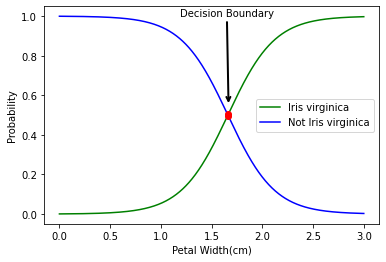

In [6]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica") 
plt.plot(X_new, y_proba[:, 0], "b-", label="Not Iris virginica")
plt.legend()
plt.xlabel("Petal Width(cm)")
plt.ylabel("Probability")
idx = np.argwhere(np.diff(np.sign(y_proba[:, 1] - y_proba[:, 0]))).flatten()
plt.plot(X_new[idx], y_proba[idx], 'ro')
plt.annotate('Decision Boundary', xy=(1.667, 0.55), xytext=(1.65, 1),horizontalalignment="center", arrowprops=dict(arrowstyle='->',lw=2))
plt.show()


In [7]:
log_reg.predict([[1.7], [1.5],[1.1], [1.9]]) # arrina de 1.5 lo toma como 1 (virginica) y abajo lo toma como 0 -  no virginica

array([1, 0, 0, 1])

In [8]:
# ejemplo softmax function - normaliza una función log - útil para filtrar datos 
import math
z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
z_exp = [math.exp(i) for i in z]
print([round(i, 2) for i in z_exp])

[2.72, 7.39, 20.09, 54.6, 2.72, 7.39, 20.09]


In [9]:
sum_z_exp = sum(z_exp)

In [10]:
softmax = [round(i / sum_z_exp, 3) for i in z_exp]
softmax

[0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]

In [11]:
np.argmax(softmax)

3

In [12]:
#cross entropy function - mide qué tan bien un set de clases prob match target class
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
iris = datasets.load_iris()

In [13]:
X = iris["data"][:, (2, 3)] # petal length, petal width 
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10) 
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [14]:
softmax_reg.predict([[5,2]])

array([2])

In [15]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])